In [1]:
import numpy as np
import matplotlib.pyplot as plt
from logger import H5Interface

In [59]:
def psgolayp(A, k, n):
    xs = np.arange(-n, n+1)
    M = np.cumprod(np.hstack((np.ones(2*n+1)[:,None], np.tile(xs, (k,1)).T)), axis=1)
    print M.shape
    df, _, _, _ = np.linalg.lstsq(M, np.eye(2*n+1))
    hx = np.array([n**i for i in range(k+1)])
    print hx.shape
    
    # SG filter coefficients
    fc = np.dot(df.T, hx.T)
    print fc.shape
    # smoothing
    #SGO = np.zeros(len(A))
    #for i in range(2*n+1, len(A)):
    #    SGO[i] = np.dot(fc, A[i-2*n:i+1])
    SGO = np.zeros(len(A))
    for i in range(2*n+1):
        SGO[i] = np.dot(fc, A)
    return np.array(SGO)

In [62]:
h = H5Interface(h5_filename='testing.h5')
fx = h.get_data('trajectory_16')['raw_data']['w_raw'][2]
filtered = psgolayp(fx[:101], 1, 50)
plt.figure(figsize=(15,12))
plt.plot(fx[101], label='raw')
plt.plot(filtered, label='filtered', color='r', lw=3.0)
plt.ylim=0.02
plt.legend()
plt.show()

(101, 2)
(2,)
(101,)


ValueError: shapes (101,) and (10001,) not aligned: 101 (dim 0) != 10001 (dim 0)

(29,)


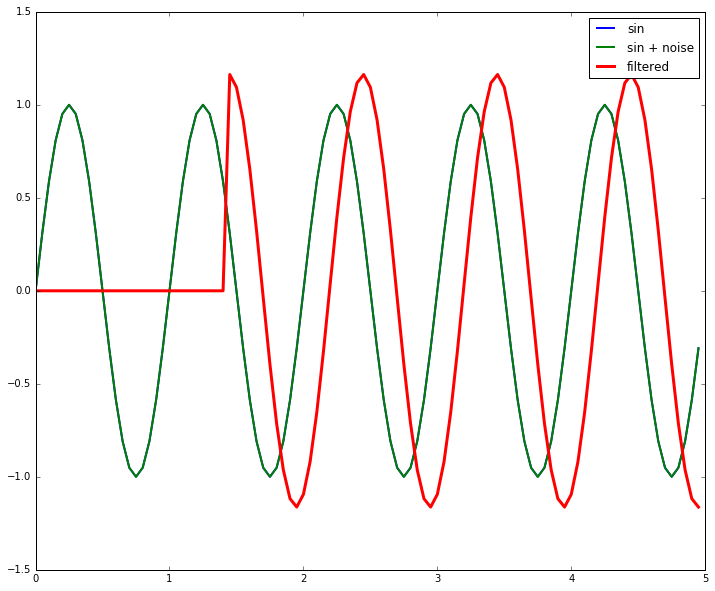

In [4]:
T = 0.05
t = T * np.arange(0, 100)
s = np.sin(2*np.pi*t)
s_noise = []
for i in range(len(t)):
    s_noise.append(s[i] + (0.0 * np.random.rand() * (-1)**np.random.randint(2)))
s_noise = np.array(s_noise)
d = psgolayp(s_noise, 2, 14)

plt.figure(figsize=(12,10))
plt.plot(t, s, label='sin', lw=2.0)
plt.plot(t, s_noise, label='sin + noise', lw=2.0)
plt.plot(t, d, label='filtered', lw=3.0)
plt.legend()
plt.show()

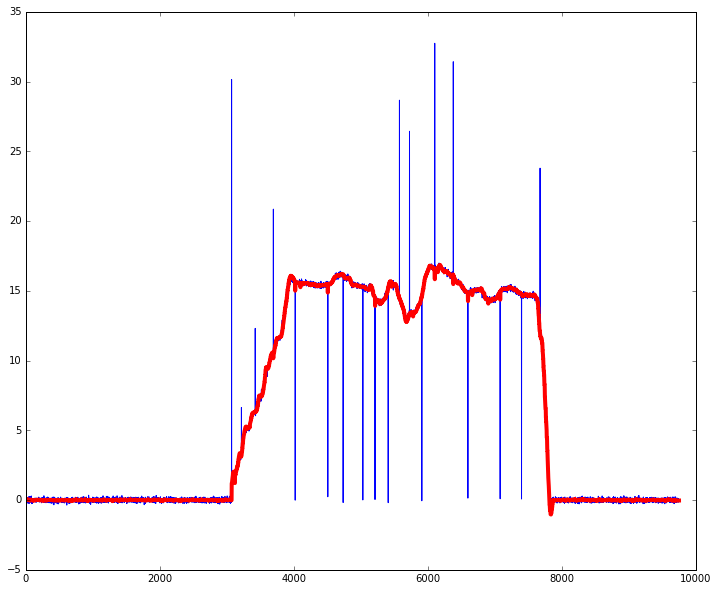

In [7]:
h = H5Interface()
data = h.get_data('trajectory_15')['raw_data']
raw_z = data['w_raw'][2]
filt_z = data['w_filt'][2]
plt.figure(figsize=(12,10))
plt.plot(raw_z)
plt.plot(filt_z, lw=4.0, color='r')
plt.savefig('fig.png')
plt.show()